# Logistic regression with Keras 
### Christian Igel, 2020

Keras is a high-level neural network programming interface. It is incoporated into TensorFlow.

## Set the stage

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


Load a data set defining a breast cancer prediction task: 

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()  
print("Data shape:", data.data.shape)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target)
print("Training data points:", X_train.shape[0])
print("Test data points:", X_test.shape[0])

# Input dimension
in_dim = X_train.shape[1]
print("Input dimensionality:", in_dim)

Data shape: (569, 30)
Training data points: 426
Test data points: 143
Input dimensionality: 30


In [41]:
print(X_train)
X_train.shape

[[1.256e+01 1.907e+01 8.192e+01 ... 9.265e-02 2.121e-01 7.188e-02]
 [1.614e+01 1.486e+01 1.043e+02 ... 1.129e-01 2.778e-01 7.012e-02]
 [7.729e+00 2.549e+01 4.798e+01 ... 0.000e+00 3.058e-01 9.938e-02]
 ...
 [1.801e+01 2.056e+01 1.184e+02 ... 1.489e-01 3.251e-01 7.625e-02]
 [1.065e+01 2.522e+01 6.801e+01 ... 6.136e-02 3.409e-01 8.147e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]]


(426, 30)

## Define logistic regression model

The logistic regression model is the same as a neural network with a single layer:

In [42]:
lambda_reg = 1e-14  # Regularization parameter

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1,  # Single output 
                        use_bias=True,  # Affine linear model (i.e., using a bias/offset parameter)
                        activation='sigmoid',  # Output is passed through a logistic function
                        input_shape=(in_dim, ),  # Dimensionality of input vector 
                        kernel_regularizer=tf.keras.regularizers.l2(lambda_reg)  # 2-norm regularization on weights (not bias)
                       )
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


The weights  of a neural network layer excluding a potential bias parameter are called kernel in TensorFlow.
`kernel_regularizer=tf.keras.regularizers.l2(1e-14)` adds $L_2$ regularization to the weights (not the bias parameter). The argument sets the regularization parameter.
In this example, the results get better without this regularization. 

## Train the model

Now we train the model:

In [43]:
# Define optimization algorithm
# opt = tf.optimizers.SGD(lr=0.001)
# opt = tf.optimizers.Adam(lr=0.005, epsilon=0.1)
opt = tf.optimizers.Adam(lr=0.001, epsilon=0.01)

# Compile model (i.e., build compute graph)
model.compile(optimizer=opt,
              loss='binary_crossentropy', metrics=['accuracy'])

# Training loop
history = model.fit(X_train, y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
4/4 [==============================] - 0s 25ms/step - loss: 108.3733 - accuracy: 0.3732 - val_loss: 120.2939 - val_accuracy: 0.3706
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 105.1802 - accuracy: 0.3732 - val_loss: 116.7977 - val_accuracy: 0.3706
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 104.7370 - accuracy: 0.3732 - val_loss: 113.2948 - val_accuracy: 0.3706
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 100.8820 - accuracy: 0.3732 - val_loss: 109.7831 - val_accuracy: 0.3706
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 94.0817 - accuracy: 0.3732 - val_loss: 106.2643 - val_accuracy: 0.3706
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 92.5107 - accuracy: 0.3732 - val_loss: 102.7921 - val_accuracy: 0.3706
Epoch 7/1000
4/4 [==============================] - 0s 11ms/step - loss: 91.3107 - accuracy: 0.3732 - val_loss: 99.3037 - val_accuracy

## Model evaluation

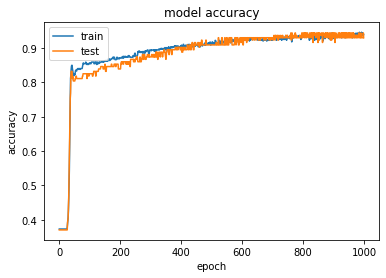

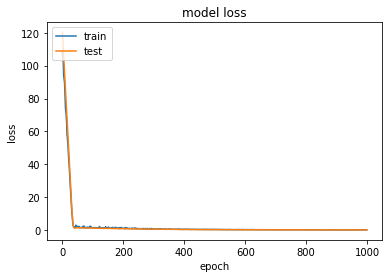

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
print("[loss, accuracy] on training data:", model.evaluate(X_train, y_train))
print("[loss, accuracy] on test data:", model.evaluate(X_test, y_test))

14/14 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9390
[loss, accuracy] on training data: [0.13845787942409515, 0.9389671087265015]
5/5 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9301
[loss, accuracy] on test data: [0.1646433174610138, 0.9300699234008789]


In [46]:
prob_prediction = model.predict(X_test).squeeze()
prediction = np.rint(prob_prediction).astype(int)
for i in np.arange(X_test.shape[0]):
    if prediction[i] != y_test[i]:
        #print(i, '%.2f' %  prob_prediction[i], prediction[i], y_test[i])
        #print(f"Index: {i}, Probability: {prob_prediction[i]}, Prediction: {prediction[i]}, True Value :{y_test[i]}")
        print("Index : {0:3d}, Probability: {1:3.2f}, Prediction: {2}, True value: {3}".format(i, prob_prediction[i], prediction[i], y_test[i]))

Index :  21, Probability: 0.97, Prediction: 1, True value: 0
Index :  31, Probability: 0.37, Prediction: 0, True value: 1
Index :  36, Probability: 0.04, Prediction: 0, True value: 1
Index :  39, Probability: 0.49, Prediction: 0, True value: 1
Index :  67, Probability: 0.89, Prediction: 1, True value: 0
Index :  68, Probability: 0.88, Prediction: 1, True value: 0
Index :  78, Probability: 0.37, Prediction: 0, True value: 1
Index : 102, Probability: 0.96, Prediction: 1, True value: 0
Index : 108, Probability: 0.64, Prediction: 1, True value: 0
Index : 125, Probability: 0.95, Prediction: 1, True value: 0


In [0]:
np.rint?